**Student ID**: `19520925`   
**Full name**: `Phạm Ngọc Tân`    
**Assignment**: `Image segmentation`

# Read and show image 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
dir_monhoc = '/gdrive/MyDrive/CS231.L22.KHCL'

In [ ]:
dir_baitap = os.path.join(dir_monhoc, 'ImageSegmentation')

In [ ]:
import cv2 as cv 
path_filename = os.path.join(dir_baitap, 'particles.bmp')
img = cv.imread(path_filename, 0)

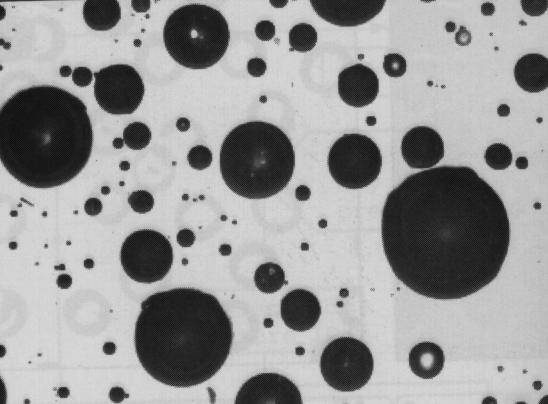

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Show image histogram and segmentated images

## Image 01: particles.bmp

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#Calculate histogram function
def TinhHist(pathfilename):
    img = cv.imread(pathfilename, 0)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0] * img.shape[1]
    hist /= size
    return hist 

In [ ]:
#Return historgram function
def ShowHistogram(pathfilename):
    plt.plot(pathfilename)
    plt.xlim([0, 256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()

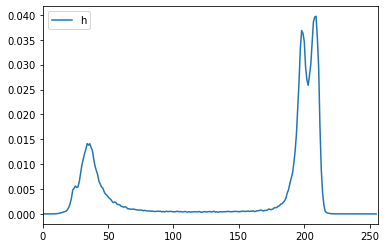

In [ ]:
hist1 = TinhHist(path_filename)
ShowHistogram(hist1)

In [ ]:
#Input T
T = int(input())

127


In [ ]:
#Segmentation function
def Segmentation(input_image, t):
    g = input_image.copy()
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            if input_image[i][j] > t:
                g[i][j] = 255
            else:
                g[i][j] = 0
    return g

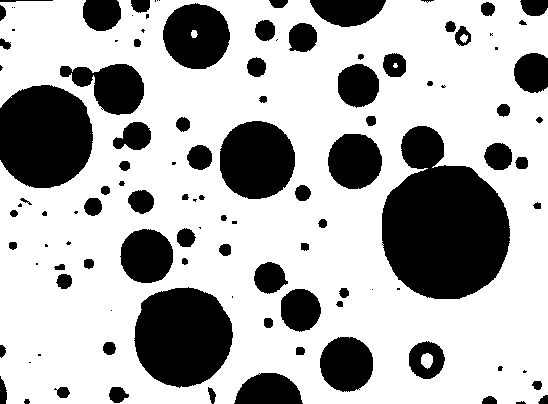

In [ ]:
#Output segmentation image
image_output = Segmentation(img, T)
cv2_imshow(image_output)

## Image 02: Phandoan01.jpg


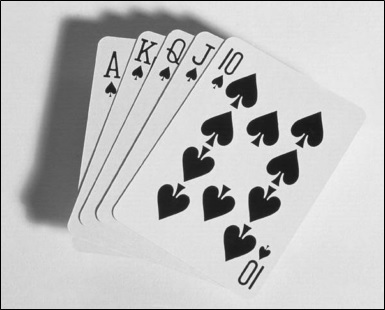

In [ ]:
import cv2 as cv 
path_filename2 = os.path.join(dir_baitap, 'Phandoan01.jpg')
img2 = cv.imread(path_filename2, 0)
cv2_imshow(img2)

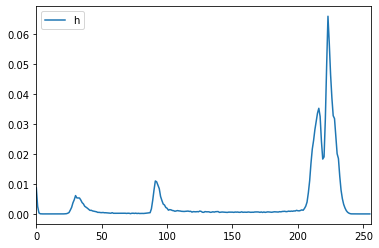

In [ ]:
hist2 = TinhHist(path_filename2)
ShowHistogram(hist2)

In [ ]:
def Card(f):
    t = f.copy()
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if f[i][j] == 0 or f[i][j] < 83:
                t[i][j] = 0
            # elif 84 < f[i][j] < 100:
            #     t[i][j] = 0
            else:
                t[i][j] = 255
    return t

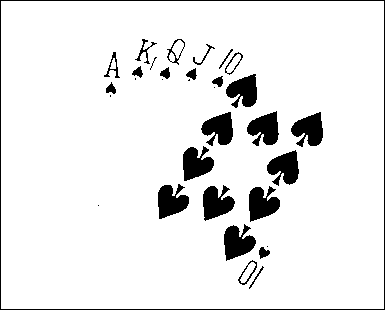

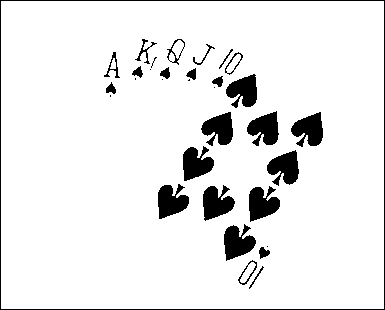

In [ ]:
#Output segmentation image
image_output2 = Segmentation(img2, 83)
cv2_imshow(image_output2)
# cv2_imshow(Card(img2))

## Image 03: Phandoan02.jpg

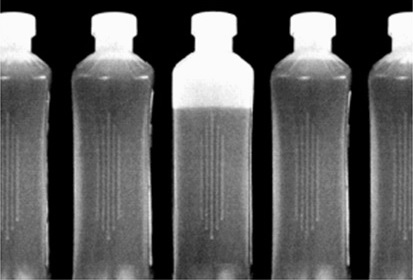

In [ ]:
import cv2 as cv 
path_filename3 = os.path.join(dir_baitap, 'Phandoan02.jpg')
img3 = cv.imread(path_filename3, 0)
cv2_imshow(img3)

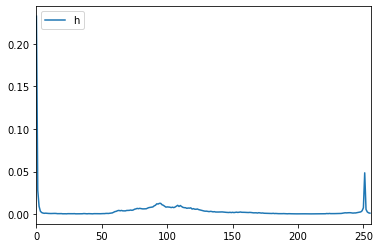

In [ ]:
hist3 = TinhHist(path_filename3)
ShowHistogram(hist3)

In [ ]:
def Seg2(img1, img2, T):
    ans = img2.copy()
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if img1[i][j] < T and img2[i][j] == 255:
                ans[i][j] = 150
            elif img1[i][j] >= T and img2[i][j] == 255:
                ans[i][j] = 255
    return ans

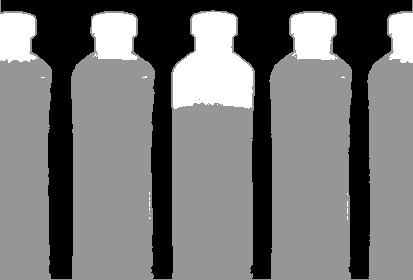

In [ ]:
#Output segmentation image
image_output3 = Segmentation(img3, 20)
ans = Seg2(img3, image_output3, 220)
cv2_imshow(ans)

## Image 04: Coins.jpg

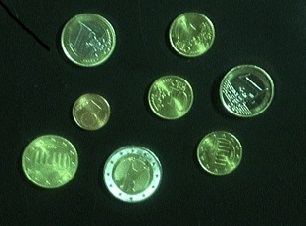

In [ ]:
import cv2 as cv 
path_filename4 = os.path.join(dir_baitap, 'Coins.jpg')
img4 = cv.imread(path_filename4)
cv2_imshow(img4)

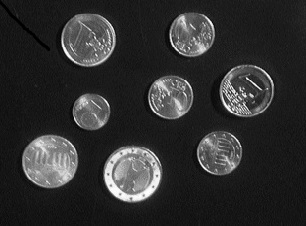

In [ ]:
#Change photo from RGB into BW
img4_BW = cv.imread(path_filename4, 0)
cv2_imshow(img4_BW)

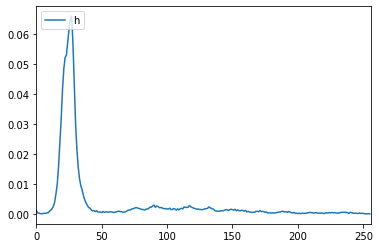

In [ ]:
hist4 = TinhHist(path_filename4)
ShowHistogram(hist4)

In [ ]:
T = 128
#Output segmentation image
image_output4 = Segmentation(img4_BW, T)
cv2_imshow(image_output4)

##Image 05: vegetables.jgp

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_img(img):
    plt.imshow(img[:, :, ::-1])
    plt.show()

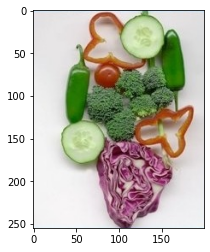

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
path_filename5 = os.path.join(dir_baitap, 'vegetables.jpg')
img5 = cv.imread(path_filename5)
show_img(img5)

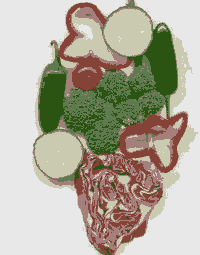

In [ ]:
#K-means clustering for segmentation
img_output = img5.reshape(img5.shape[0]*img5.shape[1], img5.shape[2])
kmeans = KMeans(n_clusters=6, random_state=0).fit(img_output)
cluster = kmeans.cluster_centers_[kmeans.labels_]
output = cluster.reshape(img5.shape[0], img5.shape[1], img5.shape[2])
# show_img(output)
cv2_imshow(output)

# Segmentation K-means(r, g, b)
## Image 6, 7, 8: hand.jpg, thuoc.jpg, dogcat.jpg




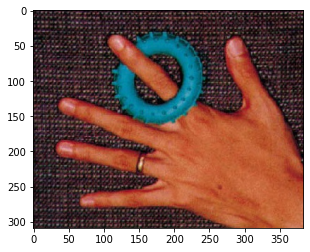

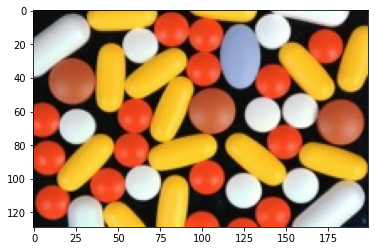

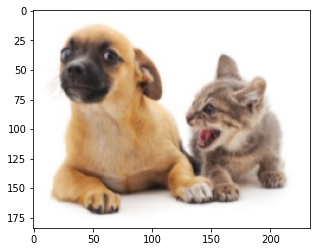

In [ ]:
path_filename6, path_filename7, path_filename8 = \
                os.path.join(dir_baitap, 'hand.jpg'), os.path.join(dir_baitap, 'thuoc.jpg'), os.path.join(dir_baitap, 'dogcat.jpg')
img6, img7, img8 = cv.imread(path_filename6), cv.imread(path_filename7), cv.imread(path_filename8)
show_img(img6)
show_img(img7)
show_img(img8)

In [ ]:
#K_means function with variable number of cluster 
def k_means_segmentation(img1, number_of_cluster):
    img = img1.copy()
    img_output = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
    kmeans = KMeans(n_clusters=number_of_cluster, random_state=0).fit(img_output)
    cluster = kmeans.cluster_centers_[kmeans.labels_]
    output = cluster.reshape(img.shape[0], img.shape[1], img.shape[2])
    return output

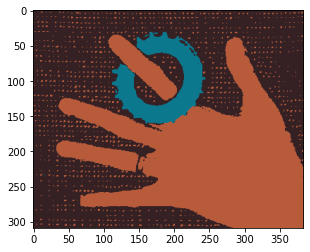

In [ ]:
img_output6 = k_means_segmentation(img6, 3)
show_img(img_output6)

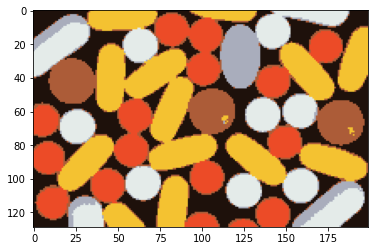

In [ ]:
img_output7 = k_means_segmentation(img7, 6)
show_img(img_output7)

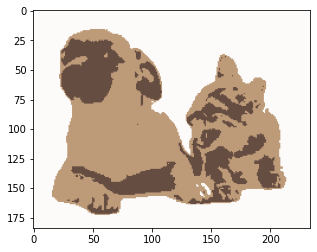

In [ ]:
img_output8 = k_means_segmentation(img8, 3)
show_img(img_output8)

# Segmentation K-means (r, g, b, x, y)


In [ ]:
import numpy as np  
#Image segmentation with K means and details' coordinates
def k_means_segmentation2(img, number_of_cluster):
    img_tmp = img.copy()
    nrow, ncol, nch1 = img_tmp.shape
    
    g = []
    for y in range(nrow):
        for x in range(ncol):
            tmp = [img_tmp[y, x][0], img_tmp[y, x][1], img_tmp[y, x][2], x, y]
            g.append(tmp)

    k_means = KMeans(n_clusters=number_of_cluster, random_state=0).fit(g)

    # t = k_means.cluster_centers_[k_means.labels_]
    
    arrcolor = np.random.rand(15, 3)*255
    t = arrcolor[k_means.labels_]

    img_rst = img_tmp
    i=0
    for y in range(nrow):
        for x in range(ncol):
            img_rst[y][x]=t[i][0:3]
            i+=1
    return img_rst

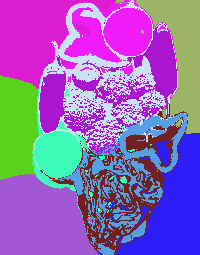

In [ ]:
img_output5 = k_means_segmentation2(img5, 11)
# show_img(img_output5)
cv2_imshow(img_output5)

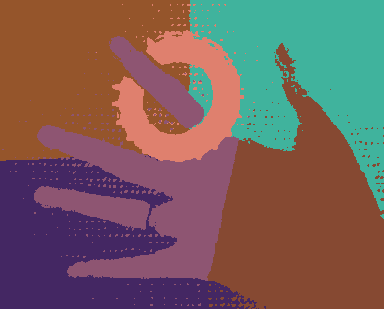

In [ ]:
img_output6 = k_means_segmentation2(img6, 6)
cv2_imshow(img_output6)

# Meanshift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
def meanShift(img, qt=0.08):
    nrow, ncol, nch1 = img.shape
    g = img.reshape(nrow*ncol, nch1)
    
    bw = estimate_bandwidth(g, quantile=qt, n_samples=500)
    clustering = MeanShift(bandwidth=bw, bin_seeding=True).fit(g)

    t = clustering.cluster_centers_[clustering.labels_]
    img_rst = t.reshape(nrow, ncol, nch1)
    return img_rst

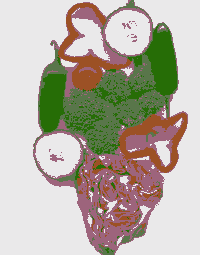

In [ ]:
img_output5 = meanShift(img5)
cv2_imshow(img_output5)

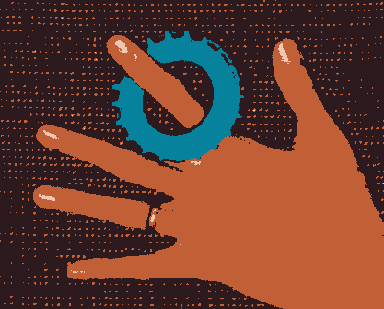

In [ ]:
img_output6 = meanShift(img6)
cv2_imshow(img_output6)

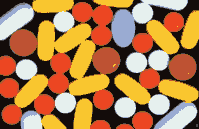

In [ ]:
img_output7 = meanShift(img7)
cv2_imshow(img_output7)

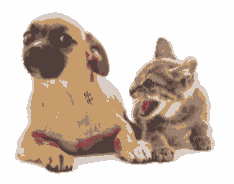

In [ ]:
img_output8 = meanShift(img8)
cv2_imshow(img_output8)

# GrabCut 


## Lionel-Messi.jpg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

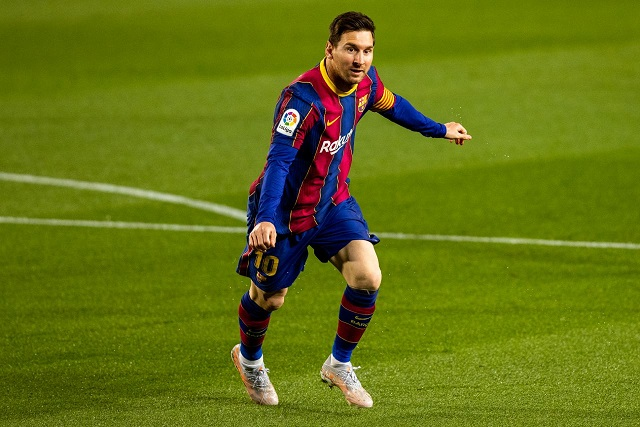

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
path_filename = os.path.join(dir_baitap, 'Lionel-Messi.jpg')
img = cv2.imread(path_filename)
cv2_imshow(img)

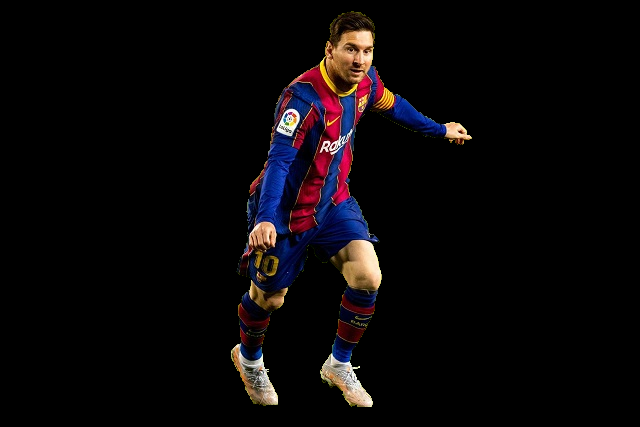

In [ ]:
mask = np.zeros(img.shape[:2], np.uint8)

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

rectangle = (200, 4, 300, 430)

cv2.grabCut(img, mask, rectangle, backgroundModel, foregroundModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

img = img * mask2[:, :, np.newaxis]

cv2_imshow(img)

## stacey.1.src.bmp


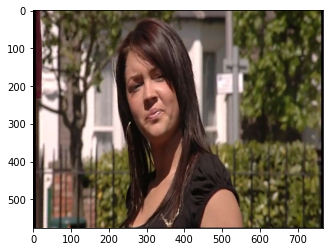

In [ ]:
path_filename2 = os.path.join(dir_baitap, 'stacey.1.src.bmp')
img2 = cv2.imread(path_filename2)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
plt.imshow(img2)
plt.show()

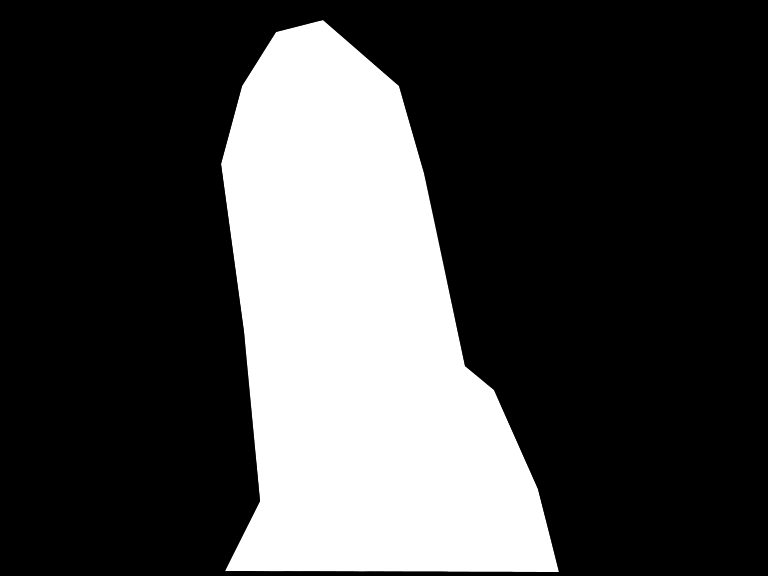

In [ ]:
path = os.path.join(dir_baitap, 'stacey.1.mask.bmp')

newmask = cv2.imread(path, 0)

mask = np.zeros(img2.shape[:2], np.uint8)

mask[newmask == 0] = 0
mask[newmask == 255] = 1
cv2_imshow(newmask)

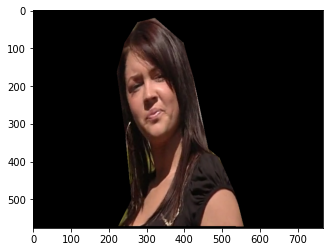

In [ ]:
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

rectangle = (200, 0, 400, 550)

# cv2.grabCut(img2, mask, rectangle, backgroundModel, foregroundModel, 5, cv2.GC_INIT_WITH_MASK)
mask, backgroundModel, foregroundModel = cv.grabCut(img2, mask, None, backgroundModel,foregroundModel, 5, cv.GC_INIT_WITH_MASK)
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

img2 = img2 * mask2[:, :, np.newaxis]

plt.imshow(img2)
plt.show()

## dogcat

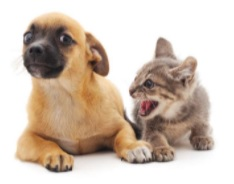

In [ ]:
path_filename3 = os.path.join(dir_baitap, 'dogcat.jpg')
img3 = cv2.imread(path_filename3)
cv2_imshow(img3)

In [ ]:
#dog
rectangle_dog = (0, 0, 160, 190)

#cat
rectangle_cat = (122, 38, 234, 184)

cat


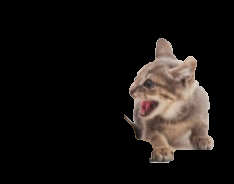

In [ ]:
inp = input()
if inp == "dog":
    mask = np.zeros(img3.shape[:2], np.uint8)

    backgroundModel = np.zero\s((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)

    cv2.grabCut(img3, mask, rectangle_dog, backgroundModel, foregroundModel, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    img3 = img3 * mask2[:, :, np.newaxis]

    cv2_imshow(img3)

elif inp == "cat":
    mask = np.zeros(img3.shape[:2], np.uint8)

    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)

    cv2.grabCut(img3, mask, rectangle_cat, backgroundModel, foregroundModel, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    img3 = img3 * mask2[:, :, np.newaxis]

    cv2_imshow(img3)